In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
##Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df_train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df_train = df_train.drop(['PassengerId', 'Name'], axis =1)
df_test = df_test.drop(['PassengerId', 'Name'], axis =1)
df_train.head()
#df_test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [5]:
dataset = [df_train, df_test]

In [6]:
df_train.describe(include = 'all')

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693
unique,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,2
top,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,True
freq,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,4378
mean,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN
std,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN


In [7]:
df_train.nunique()

HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Transported        2
dtype: int64

In [8]:
df_train.dtypes

HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [9]:
print('No. of rows in training set: {} '.format(df_train.shape[0]))
print('No. of columns in training set: {} '.format(df_train.shape[1]))

print('No. of rows in testing set: {} '.format(df_test.shape[0]))
print('No. of columns in testing set: {} '.format(df_test.shape[1]))

No. of rows in training set: 8693 
No. of columns in training set: 12 
No. of rows in testing set: 4277 
No. of columns in testing set: 11 


/tmp/ipykernel_18/2885896283.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0-12' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data['Age']<=12.0,'Age_group']='0-12'
/tmp/ipykernel_18/2885896283.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0-12' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data['Age']<=12.0,'Age_group']='0-12'


Text(0.5, 1.0, 'Age group distribution')

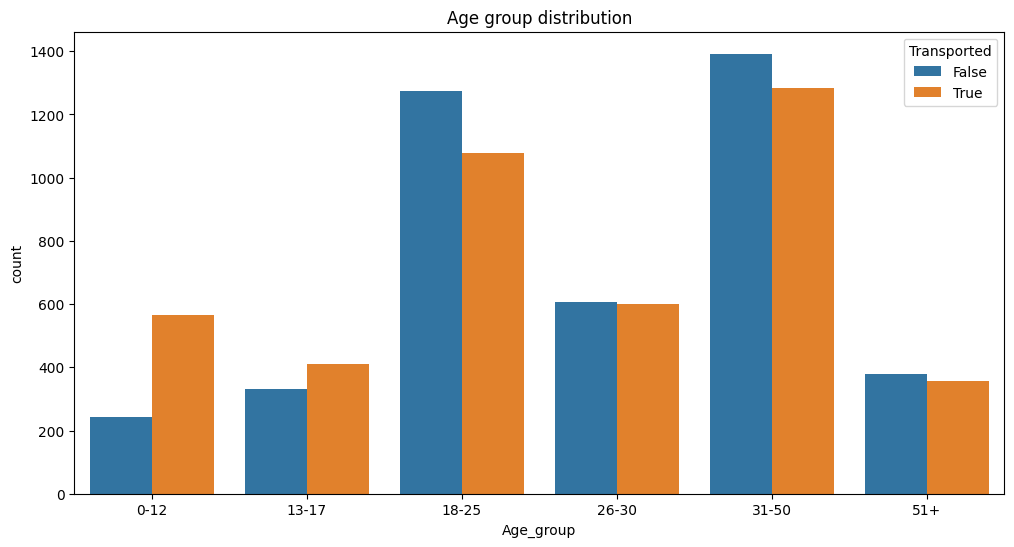

In [10]:
for data in dataset: 
    data['Age_group']=np.nan
    data.loc[data['Age']<=12.0,'Age_group']='0-12'
    data.loc[(data['Age']>12.0) & (data['Age']<=17.0),'Age_group']='13-17'
    data.loc[(data['Age']>17.0) & (data['Age']<=25.0),'Age_group']='18-25'
    data.loc[(data['Age']>25.0) & (data['Age']<=30.0),'Age_group']='26-30'
    data.loc[(data['Age']>30.0) & (data['Age']<=50.0),'Age_group']='31-50'
    data.loc[data['Age']>50.0,'Age_group']='51+'

# Plot distribution of new features
plt.figure(figsize=(12,6))
g=sns.countplot(data=df_train, x='Age_group', hue='Transported', order=['0-12','13-17','18-25','26-30','31-50','51+'])
plt.title('Age group distribution')

In [11]:
# Expenditure features
exp_cols=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Categorical features
cat_cols=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Qualitative features
qual_cols=['Cabin' ]

In [12]:
df_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Age_group
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,31-50
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,18-25
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,51+
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,31-50
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,13-17


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


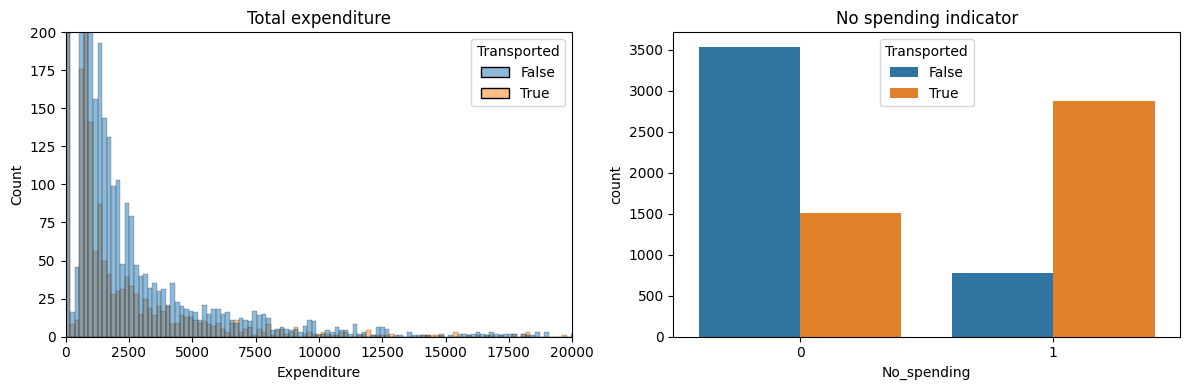

In [13]:
for data in dataset: 
    data['Expenditure']=data[exp_cols].sum(axis=1)
    data['No_spending']=(data['Expenditure']==0).astype(int)

# Plot distribution of new features
fig=plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data=df_train, x='Expenditure', hue='Transported', bins=200)
plt.title('Total expenditure')
plt.ylim([0,200])
plt.xlim([0,20000])

plt.subplot(1,2,2)
sns.countplot(data=df_train, x='No_spending', hue='Transported')
plt.title('No spending indicator')
fig.tight_layout()

In [14]:
col_names = df_train.columns
#col_names[[1]]

for col_name in col_names:
    print('No. of null values in {} : {}'.format(col_name, df_train[col_name].isnull().sum()))

No. of null values in HomePlanet : 201
No. of null values in CryoSleep : 217
No. of null values in Cabin : 199
No. of null values in Destination : 182
No. of null values in Age : 179
No. of null values in VIP : 203
No. of null values in RoomService : 181
No. of null values in FoodCourt : 183
No. of null values in ShoppingMall : 208
No. of null values in Spa : 183
No. of null values in VRDeck : 188
No. of null values in Transported : 0
No. of null values in Age_group : 179
No. of null values in Expenditure : 0
No. of null values in No_spending : 0


In [15]:
df_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Age_group,Expenditure,No_spending
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,31-50,0.0,1
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,18-25,736.0,0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,51+,10383.0,0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,31-50,5176.0,0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,13-17,1091.0,0


In [16]:
df_train = df_train.drop(['Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis = 1)
df_train[:10]

,HomePlanet,CryoSleep,Cabin,Destination,Transported,Age_group,Expenditure,No_spending
0,Europa,False,B/0/P,TRAPPIST-1e,False,31-50,0.0,1
1,Earth,False,F/0/S,TRAPPIST-1e,True,18-25,736.0,0
2,Europa,False,A/0/S,TRAPPIST-1e,False,51+,10383.0,0
3,Europa,False,A/0/S,TRAPPIST-1e,False,31-50,5176.0,0
4,Earth,False,F/1/S,TRAPPIST-1e,True,13-17,1091.0,0
5,Earth,False,F/0/P,PSO J318.5-22,True,31-50,774.0,0
6,Earth,False,F/2/S,TRAPPIST-1e,True,26-30,1584.0,0
7,Earth,True,G/0/S,TRAPPIST-1e,True,26-30,0.0,1
8,Earth,False,F/3/S,TRAPPIST-1e,True,31-50,1018.0,0
9,Europa,True,B/1/P,55 Cancri e,True,13-17,0.0,1


In [17]:
df_test = df_test.drop(['Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis = 1)
df_test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age_group,Expenditure,No_spending
0,Earth,True,G/3/S,TRAPPIST-1e,26-30,0.0,1
1,Earth,False,F/4/S,TRAPPIST-1e,18-25,2832.0,0
2,Europa,True,C/0/S,55 Cancri e,31-50,0.0,1
3,Europa,False,C/1/S,TRAPPIST-1e,31-50,7418.0,0
4,Earth,False,F/5/S,TRAPPIST-1e,18-25,645.0,0


In [18]:
df_train.dtypes

HomePlanet      object
CryoSleep       object
Cabin           object
Destination     object
Transported       bool
Age_group       object
Expenditure    float64
No_spending      int64
dtype: object

In [19]:
cat_cols = df_train.select_dtypes(include=['object', 'category']).columns
print(cat_cols)

##Encoding categorical columns
from sklearn.preprocessing import LabelEncoder
lb_en = LabelEncoder()

for col in cat_cols:
    df_train[col] = lb_en.fit_transform(df_train[col])
    
df_train['Transported'] = lb_en.fit_transform(df_train['Transported'])

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age_group'], dtype='object')


In [20]:
df_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Transported,Age_group,Expenditure,No_spending
0,1,0,149,2,0,4,0.0,1
1,0,0,2184,2,1,2,736.0,0
2,1,0,1,2,0,5,10383.0,0
3,1,0,1,2,0,4,5176.0,0
4,0,0,2186,2,1,1,1091.0,0


In [21]:
df_set = [df_train, df_test]
df_set[0]

,HomePlanet,CryoSleep,Cabin,Destination,Transported,Age_group,Expenditure,No_spending
0,1,0,149,2,0,4,0.0,1
1,0,0,2184,2,1,2,736.0,0
2,1,0,1,2,0,5,10383.0,0
3,1,0,1,2,0,4,5176.0,0
4,0,0,2186,2,1,1,1091.0,0
...,...,...,...,...,...,...,...,...
8688,1,0,146,0,0,4,8536.0,0
8689,0,1,5280,1,0,2,0.0,1
8690,0,0,5285,2,1,3,1873.0,0
8691,1,0,2131,0,0,4,4637.0,0


In [22]:
col_names = df_train.columns
#col_names[[1]]

for col_name in col_names:
    print('No. of null values in {} : {}'.format(col_name, df_train[col_name].isnull().sum()))

No. of null values in HomePlanet : 0
No. of null values in CryoSleep : 0
No. of null values in Cabin : 0
No. of null values in Destination : 0
No. of null values in Transported : 0
No. of null values in Age_group : 0
No. of null values in Expenditure : 0
No. of null values in No_spending : 0


In [23]:
X = df_train.drop(['Transported'], axis = 1)
y = df_train['Transported']
X
#y

,HomePlanet,CryoSleep,Cabin,Destination,Age_group,Expenditure,No_spending
0,1,0,149,2,4,0.0,1
1,0,0,2184,2,2,736.0,0
2,1,0,1,2,5,10383.0,0
3,1,0,1,2,4,5176.0,0
4,0,0,2186,2,1,1091.0,0
...,...,...,...,...,...,...,...
8688,1,0,146,0,4,8536.0,0
8689,0,1,5280,1,2,0.0,1
8690,0,0,5285,2,3,1873.0,0
8691,1,0,2131,0,4,4637.0,0


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_cval, y_train, y_cval = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_cval = sc.fit_transform(X_cval)

In [26]:
##Importing Keras libraries
import tensorflow as tf
import keras
#from keras.models import Sequential
from keras.layers import Dense
#from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout
#from keras.losses import BinaryCrossEntropy

2024-03-02 07:26:50.536245: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-02 07:26:50.536380: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-02 07:26:50.730612: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [27]:
## Initializing the ANN
model = tf.keras.models.Sequential()

In [28]:
##Adding input layer and the first hidden layer
model.add(tf.keras.Input(shape = (7, )))
model.add(Dense(6, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dropout(0.3))

In [29]:
##second hidden layer
model.add(Dense(6, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dropout(0.2))

In [30]:
##output layer
model.add(Dense(1, activation = 'sigmoid'))

In [31]:
##initializing optimizer
optimizer = tf.keras.optimizers.Adamax()

##compiling the model
model.compile(optimizer = optimizer, loss = tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [32]:
X_train[0]

array([ 1.46845046, -0.74894277, -0.22855469,  0.58078956,  0.79021831,
        0.41229908, -0.85791529])

In [33]:
model_history = model.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_data = (X_cval, y_cval))

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4619 - loss: 1.1331 - val_accuracy: 0.4077 - val_loss: 0.8380
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4623 - loss: 0.8638 - val_accuracy: 0.3861 - val_loss: 0.7336
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4467 - loss: 0.7590 - val_accuracy: 0.4845 - val_loss: 0.6966
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4850 - loss: 0.7231 - val_accuracy: 0.5788 - val_loss: 0.6788
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5432 - loss: 0.6995 - val_accuracy: 0.5900 - val_loss: 0.6683
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5341 - loss: 0.7026 - val_accuracy: 0.6029 - val_loss: 0.6608
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5593 - loss: 0.6780 - val_accuracy: 0.6095 - val_loss: 0.6537
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5602 - loss: 0.6825 - val_accu

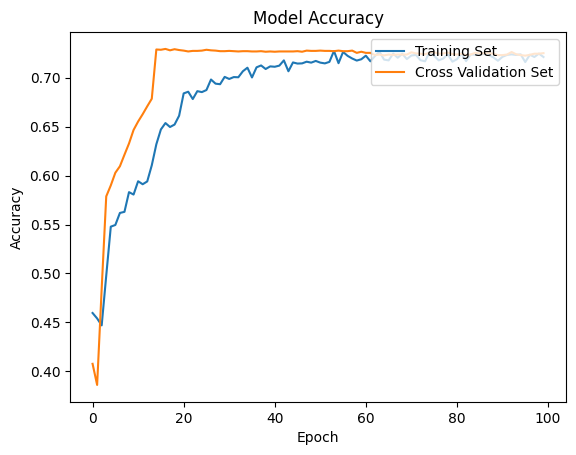

In [34]:
## summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Cross Validation Set'], loc = 'upper right')

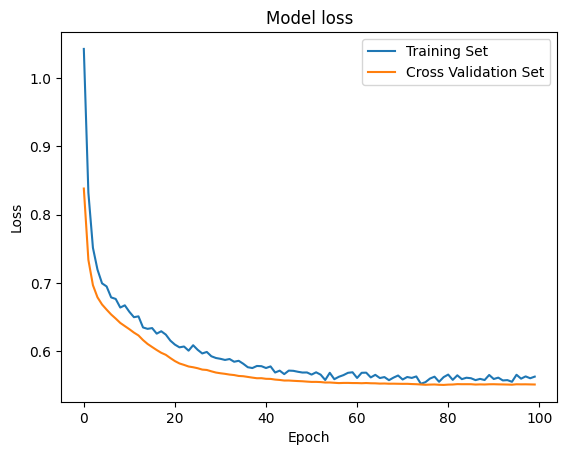

In [35]:
## summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Cross Validation Set'], loc = 'upper right')

In [36]:
df_test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age_group,Expenditure,No_spending
0,Earth,True,G/3/S,TRAPPIST-1e,26-30,0.0,1
1,Earth,False,F/4/S,TRAPPIST-1e,18-25,2832.0,0
2,Europa,True,C/0/S,55 Cancri e,31-50,0.0,1
3,Europa,False,C/1/S,TRAPPIST-1e,31-50,7418.0,0
4,Earth,False,F/5/S,TRAPPIST-1e,18-25,645.0,0


In [37]:
cat_cols = df_test.select_dtypes(include=['object', 'category']).columns
print(cat_cols)

for col in cat_cols:
    df_test[col] = lb_en.fit_transform(df_test[col])

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age_group'], dtype='object')


In [38]:
df_test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age_group,Expenditure,No_spending
0,0,1,2784,2,3,0.0,1
1,0,0,1867,2,2,2832.0,0
2,1,1,257,0,4,0.0,1
3,1,0,259,2,4,7418.0,0
4,0,0,1940,2,2,645.0,0


In [39]:
df_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Transported,Age_group,Expenditure,No_spending
0,1,0,149,2,0,4,0.0,1
1,0,0,2184,2,1,2,736.0,0
2,1,0,1,2,0,5,10383.0,0
3,1,0,1,2,0,4,5176.0,0
4,0,0,2186,2,1,1,1091.0,0


In [40]:
print(type(X_train))
print(X_train[1])

X_test = df_test.values
X_test = sc.fit_transform(X_test)
#print(X_test[1])

<class 'numpy.ndarray'>
[ 1.46845046 -0.74894277  0.09219711  0.58078956  0.79021831  0.42451333
 -0.85791529]


In [41]:
## predicting test dataset results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [42]:
df_sub = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
df_sub['Transported'] = y_pred
df_sub.to_csv('/kaggle/working/submission.csv', index=False)
df_sub[:10]

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
5,0027_01,False
6,0029_01,True
7,0032_01,True
8,0032_02,True
9,0033_01,False
